## 로지스틱 회귀

### 먼저 knn으로 분류 해보자

### 데이터 준비

In [9]:
#데이터 준비
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv')
# fish.head()
# print(pd.unique(fish['Species'])) #어떤 종이 있는지 데이터 프레임확인

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
# print(fish_input[:5])
fish_target = fish['Species'].to_numpy()

#데이터 훈련, 테스트 셋 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
        fish_input, fish_target, random_state=42)

#표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [12]:
#최근접이웃 분류기를 만들어서 클래스 분류 확률을 볼것이다
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors =3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [14]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [16]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals =4))

#분류 확률

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


## 로지스틱회귀로 분류

In [17]:
#도미(Breum)와 빙어(Smelt)의 행만 분류해보자
#도미와 빙어 일경우 트루 이고 그 외 모두 False
bream_smelt_indexes = (train_target == 'Bream')| (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [22]:
print(lr.predict_proba(train_bream_smelt[:5]))#예측확률 메서드 predict_proba

[[0.99124329 0.00875671]
 [0.01413656 0.98586344]
 [0.98326545 0.01673455]
 [0.96045744 0.03954256]
 [0.99165598 0.00834402]]


In [23]:
print(lr.coef_, lr.intercept_)

[[-0.23113379 -0.33550888 -0.52922923 -1.3781345  -0.50236234]] [-0.828235]


In [24]:
#z값
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-4.72913982  4.24475346 -4.07340375 -3.1900321  -4.77783134]


In [25]:
#z값을 시그모이드 함수에 대입하면 확률을 얻을 수 있다
#사이파이에 존재하는 시그모이드 메서드 'expit()'
from scipy.special import expit
print(expit(decisions))

[0.00875671 0.98586344 0.01673455 0.03954256 0.00834402]


### 로지스틱 회귀 다중 분류

In [26]:
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8991596638655462
0.925


C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [32]:
#print(lr.predict(test_scaled[:6]))
#예측 확률 보자
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.044 0.696 0.001 0.227 0.02  0.012]
 [0.    0.047 0.123 0.004 0.051 0.774 0.001]
 [0.    0.    0.039 0.792 0.073 0.093 0.002]
 [0.011 0.01  0.587 0.01  0.335 0.001 0.045]
 [0.    0.001 0.696 0.013 0.261 0.014 0.015]]


## SGDClassifier

In [34]:
#경사하강법을 통한 분류모델
#데이터 프레임 제작
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')

#species 열을 제외한 나머지는 입력데이터로 사용 Species 열은 타겟데이터로!
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

#테스트, 훈련세트 나누자
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state = 42)

#표준화 전처리!
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
#경사하강법 분류 클래스
from sklearn.linear_model import SGDClassifier

#loss ='log'로 지정 로지스틱 손실함수 지정
sc = SGDClassifier(loss = 'log', max_iter =10, random_state =42)
sc.fit(train_scaled, train_target)
# print(sc.score(train_scaled, train_target))
# print(sc.score(test_scaled, test_target))

#모델에 이어서 에포크를 이어서 훈련하려면 partial_fit() 메서드를 사용한다
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7647058823529411
0.725


C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
C:\Users\82102\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


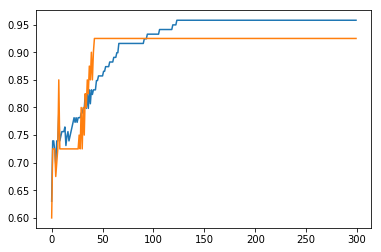

In [39]:
#과적합, 과소적합 확인
import numpy as np 
sc = SGDClassifier(loss = 'log', random_state = 42)
train_score = []
test_score = []
classes = np.unique(train_target)

#300번의 에포크 훈련 해보겠다 반복마다 점수를 계산해서 리스트에 추가
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes = classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

#그래프로 그려보자
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.show()